## Notebook to demonstrate SciPY optimization methods

Mathematical optimization is at the heart of solutions to major business problems in engineering, finance, healthcare, socioeconomic affairs. Pretty much all business problems boil down to minimization of some kind of resource cost or maximization of some kind of profit given other constraints.

An optimization process is also the soul of operation research, which is intimately related to modern data-driven business analytics. In this manner, it is also closely related to the data science pipeline, employed in virtually all businesses today. 

Although much has been written about the data wrangling and predictive modeling aspects of a data science project, the final frontier often involves solving an optimization problem using the data-driven models which can improve the bottom-line of the business by reducing cost or enhancing productivity.

Python has become the de-facto lingua franca of analytics, data science, and machine learning. Therefore, it makes sense to discuss optimization packages and frameworks within the Python ecosystem.

We cover optimization algorithms available within the SciPy ecosystem. SciPy is the most widely used Python package for scientific and mathematical analysis and it is no wonder that it boasts of powerful yet easy-to-use optimization routines for solving complex problems.

For more information see

#### [SciPy optimization reference guide](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

### Minimize a simple scalar function: $\text{sin}(x).\text{exp}[(x-0.6)^2]$

In [2]:
def scalar1(x):
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)

In [3]:
def plot_nice(x,y,title=None,xlabel='x',ylabel='y',show=True):
    #plt.figure(figsize=(8,5))
    if title!=None:
        plt.title(str(title)+'\n',fontsize=18)
    plt.plot(x,y,color='k',lw=3)
    plt.grid(True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    if show:
        plt.show()

In [4]:
x = np.arange(-10,10,0.05)

In [5]:
y = scalar1(x)

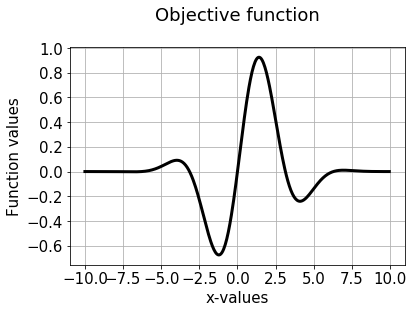

In [6]:
plot_nice(x,y,title="Objective function",xlabel='x-values',ylabel='Function values')

### Use `optimize.minimize_scalar()` method

In [7]:
result = optimize.minimize_scalar(scalar1)

In [8]:
result['success']

True

In [9]:
print("Minimum occurs at: ",result['x'])

Minimum occurs at:  -1.2214484245210282


In [10]:
print(result)

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282


### Bounded search (bound on the independent variable)

In [11]:
result = optimize.minimize_scalar(scalar1,bounds=(0,10),method='Bounded')

In [12]:
print("When bounded between 0 and 10, minimum occurs at: ",result['x'])

When bounded between 0 and 10, minimum occurs at:  4.101466164987216


### Other function-based constraints

In [13]:
def constraint1(x):
    return 0.5-np.log10(x**2+2)

In [14]:
def constraint2(x):
    return np.log10(x**2+2) - 1.5

In [15]:
def constraint3(x):
    return np.sin(x)+0.3*x**2-1

In [16]:
cons = ({'type':'ineq','fun':constraint1},
        {'type':'ineq','fun':constraint2},
       {'type':'eq','fun':constraint3})

In [17]:
result = optimize.minimize(scalar1,x0=0,method='SLSQP',constraints=cons,options={'maxiter':100})

In [18]:
print(result)

     fun: 0.7631695862891654
     jac: array([0.59193639])
 message: 'Iteration limit exceeded'
    nfev: 1254
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([0.8773752])


In [19]:
result = optimize.minimize(scalar1,x0=-20,method='SLSQP',constraints=cons,options={'maxiter':100})

In [20]:
print(result)

     fun: -0.28594944567686104
     jac: array([-0.46750661])
 message: 'Iteration limit exceeded'
    nfev: 1233
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([-2.37569791])


In [21]:
result = optimize.minimize(scalar1,x0=-20,method='SLSQP',constraints=cons,options={'maxiter':3})

In [22]:
print(result)

     fun: -0.4155114388552631
     jac: array([-0.46860977])
 message: 'Iteration limit exceeded'
    nfev: 12
     nit: 4
    njev: 4
  status: 9
 success: False
       x: array([-2.10190632])


### Multi-variate case: Sum of Gaussians

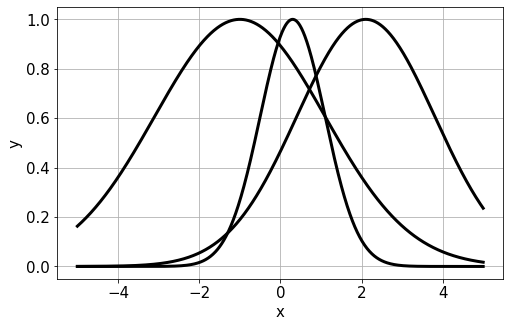

In [23]:
mu = [-1,0.3,2.1]
sigma = [2.1,0.8,1.7]
add=np.zeros(1000)
plt.figure(figsize=(8,5))
for m,s in zip(mu,sigma):
    x=np.arange(-5,5,0.01)
    y=np.exp(-(x-m)**2/(2*s**2))
    add+=y
    plot_nice(x,y,show=False)
    
plt.show()

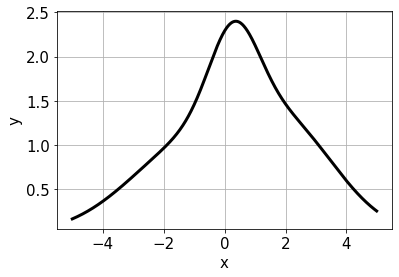

In [24]:
plot_nice(x=np.arange(-5,5,0.01),y=add)

In [25]:
def gaussian(m,s):
    x = np.arange(-5,5,0.01)
    return np.exp(-(x-m)**2/(2*s**2))

In [26]:
def gaussian_mixture(x):
    """
    Computes the resultant Gaussian mixture from an input vector and known mean, variance quantities
    """
    return -(np.exp(-(x[0]+1)**2/(2.1**2))+np.exp(-(x[1]-0.3)**2/(0.8**2))+np.exp(-(x[2]-2.1)**2/(1.7**2)))

In [27]:
gaussian_mixture(np.array([3,-2,2]))

-1.0233691172715331

In [28]:
x0=np.array([0]*3)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100})

In [29]:
result

     fun: -2.9999996182639146
     jac: array([-8.09729099e-05, -2.40176916e-04,  7.11053610e-04])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-1.00017856,  0.29992313,  2.10102744])

### Bounds with multiple variables

In [30]:
x0=np.array([0]*3)
x1_bound = (-2,2)
x2_bound = (0,5)
x3_bound = (-3,0)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100},
                           bounds=(x1_bound,x2_bound,x3_bound))

In [31]:
result

     fun: -2.217414055755018
     jac: array([-2.89082527e-06,  3.60012054e-04, -3.15965086e-01])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-1.00000644e+00,  3.00115191e-01, -8.03574200e-17])